In [36]:
#importing

import sys
import os
print("Current working directory: ", os.getcwd())
import matplotlib.pyplot as plt
import numpy as np    
import pandas as pd
#!{sys.executable} -m pip install sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler

Current working directory:  /home/hp/Documents/IML/IML_2022/A2


In [37]:
#load in data: A2_data.csv
data = pd.read_csv('A2_data.csv')
print("The shape of the data is", data.shape)

The shape of the data is (100000, 12)


In [38]:
#Print data properties
print("These are the variables:",data.columns)
print("The data points have one of three labels:", np.unique(data['class']))
print("The amount of galaxies is",np.count_nonzero([np.where(data['class']=="GALAXY")]))
print("The amount of QSOs is",np.count_nonzero([np.where(data['class']=="QSO")]))
print("The amount of stars is",np.count_nonzero([np.where(data['class']=="STAR")]))

These are the variables: Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD',
       'redshift', 'plate', 'class'],
      dtype='object')
The data points have one of three labels: ['GALAXY' 'QSO' 'STAR']
The amount of galaxies is 59444
The amount of QSOs is 18961
The amount of stars is 21594


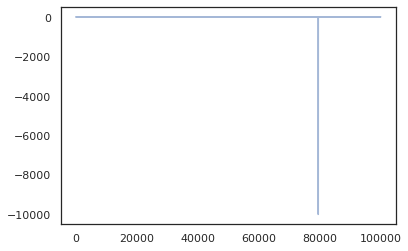

In [39]:
#finding outliers
plt.plot(data['u'], alpha = 0.5)
plt.show()
#find outliers
#plt.plot(data['g'], alpha = 0.5)
#plt.show()
#plt.plot(data['r'], alpha = 0.5)
#plt.show()
#plt.plot(data['i'], alpha = 0.5)
#plt.show()
#plt.plot(data['redshift'], alpha = 0.5)
#plt.show()

In [40]:
#when selecting data...
#print("The index of the outlier is",np.where(data['z']<0))
datagood = data.loc[np.where(data['z']>0)]
#plt.plot(datagood['u'], alpha = 0.5)

datashort = datagood[['alpha', 'delta','u','g','r','i','z','MJD',"redshift", 'class']]

In [41]:
datashort

,alpha,delta,u,g,r,i,z,MJD,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,56064,-0.001584,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,53727,-0.824700,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,54883,-0.418000,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,51783,5.953000,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,56069,0.846000,GALAXY
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,55590,1.046000,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,53531,5.290000,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,58162,-4.145000,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,52376,7.152000,GALAXY


# Visualization 

['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD', 'redshift', 'plate', 'class']


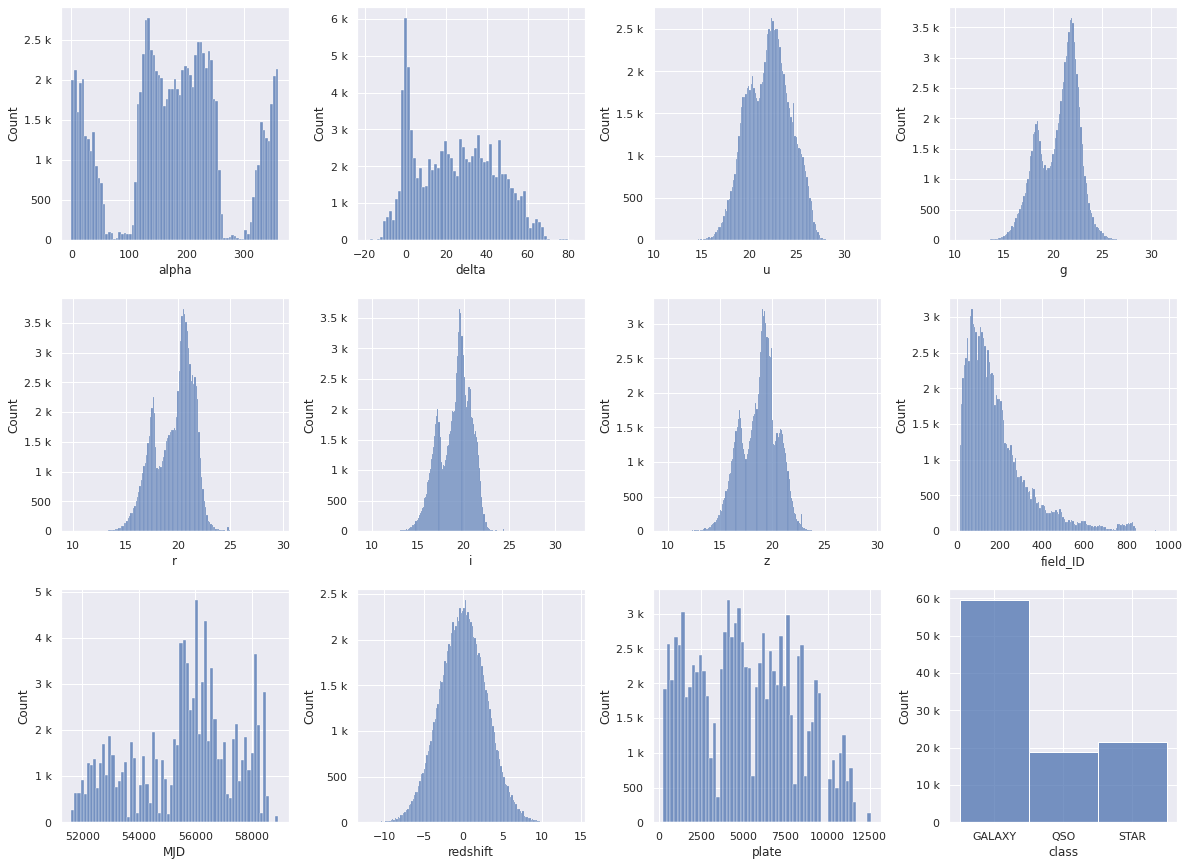

In [42]:
sns.set(font_scale=1)
fig, ax = plt.subplots(3,4, figsize = (20, 15))
ax = np.array(ax).flatten()
feature = list(datagood.columns)
print(feature)
for i, ax in enumerate(ax):
    sns.histplot(data=datagood, x=feature[i], ax = ax)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.subplots_adjust(wspace=.3, hspace=.25)


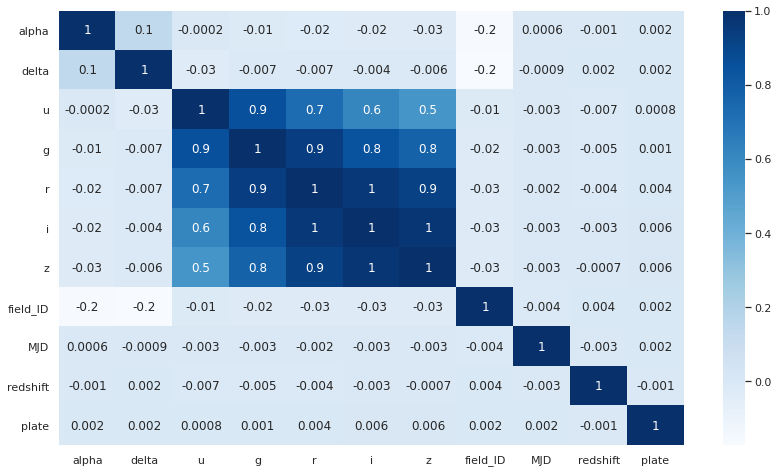

In [43]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = datagood.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [44]:
# use integers to represent the class labels

data_used = datashort.copy()
data_used['class'] = data_used['class'].map({"GALAXY":1, "QSO":2, "STAR":3}) 
data_used

,alpha,delta,u,g,r,i,z,MJD,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,56064,-0.001584,1
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,53727,-0.824700,1
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,54883,-0.418000,1
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,51783,5.953000,1
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,56069,0.846000,1
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,55590,1.046000,1
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,53531,5.290000,1
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,58162,-4.145000,1
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,52376,7.152000,1


# PCA reduction
use PCA to reduce the data into 4 dimensions

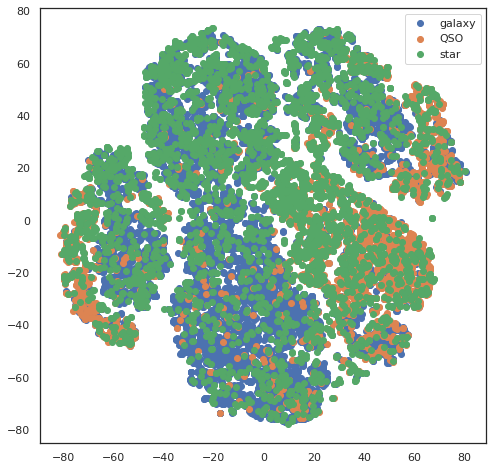

In [48]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

# reduced dimenesion
n_comp = 2
# numpy array without the class labels
data_feature = data_used.drop("class", axis = 1).to_numpy()[:20000]
# class labels using strings
data_label = datagood["class"].to_numpy()[:20000]
# class labels using integers
data_label_num = data_used["class"].to_numpy()[:20000]

# #X2 = StandardScaler().fit_transform(data_feature)
X2 = preprocessing.scale(data_feature)

# pca = PCA(n_components=n_comp)
# red_com = pca.fit(X2).transform(X2)
# #fit = pca.fit(data_feature)
# #red_com = fit.transform(data_feature)

# #Use t-sne for data reduction
red_com = TSNE(n_components=2).fit_transform(X2)

# visualize the reduced data.
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(red_com[data_label == "GALAXY"][:,0], red_com[data_label == "GALAXY"][:,1], label = "galaxy")
ax.scatter(red_com[data_label == "QSO"][:,0], red_com[data_label == "QSO"][:,1], label = "QSO")
ax.scatter(red_com[data_label == "STAR"][:,0], red_com[data_label == "STAR"][:,1], label = "star")
plt.legend()

In [10]:
print(red_com[:10].shape)
print(data_feature[:10].shape)

(10, 2)
(10, 9)


# SVMs (support-vector machines) are supervised learning methods used for classification

In [13]:
from sklearn.cluster import KMeans
from sklearn import svm

acclist = []
#Cross-validation (KFold)
kfold = KFold(n_splits = 5)
print(kfold)

#train in each loop, PCA reduced data
for train_ind, test_ind in kfold.split(red_com[:10000]): #(data_feature[10000]):
    train_X = red_com[train_ind]
    train_y = data_label_num[train_ind]
    test_X = red_com[test_ind]
    test_y = data_label_num[test_ind]
    
#     kmeans = KMeans(n_clusters=3, random_state=0).fit(train_X)
#     label = kmeans.predict(train_y)
    clf = svm.SVC(C = 2)
    clf.fit(train_X,train_y)
    #accuracy
    acc = np.sum(clf.predict(test_X) == test_y)/len(test_y)
    #print("x",clf.predict(test_X))
    #print("y",test_y)
    print("accuracy {}".format(acc))
    acclist.append(acc)
    
print("Average score:", np.mean(acclist)) 

KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.6675
accuracy 0.561
accuracy 0.526
accuracy 0.6575
accuracy 0.6375
Average score: 0.6099


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
acclist = []
#Cross-validation (KFold)
kfold = KFold(n_splits = 5)
print(kfold)

final_data = red_com
#train in each loop, PCA reduced data
for train_ind, test_ind in kfold.split(final_data[:20000]):
    train_X = final_data[train_ind]
    train_y = data_label_num[train_ind]
    test_X = final_data[test_ind]
    test_y = data_label_num[test_ind]
    
#     kmeans = KMeans(n_clusters=3, random_state=0).fit(train_X)
#     label = kmeans.predict(train_y)
    clf = RandomForestClassifier(max_depth=6, random_state=0)
    clf.fit(train_X,train_y)
    #accuracy
    acc = np.sum(clf.predict(test_X) == test_y)/len(test_y)
    #print("x",clf.predict(test_X))
    #print("y",test_y)
    print("accuracy {}".format(acc))
    acclist.append(acc)
    
print("Average score:", np.mean(acclist)) 

KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.731
accuracy 0.69975
accuracy 0.6895
accuracy 0.7095
accuracy 0.695
Average score: 0.70495


In [14]:
#using accuracy score defined by sklearn

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

#Cross-validation (KFold)
kfold = KFold(n_splits = 5)
print(kfold)
model = svm.SVC()

acc_score=[]

#train in each loop
for train_ind, test_ind in kfold.split(red_com[:10000]):
    train_X = red_com[train_ind]
    train_y = data_label_num[train_ind]
    test_X = red_com[test_ind]
    test_y = data_label_num[test_ind]

#     kmeans = KMeans(n_clusters=3, random_state=0).fit(train_X)
#     label = kmeans.predict(train_y)
    #clf = svm.SVC()
    #clf.fit(train_X,train_y)
    model.fit(train_X, train_y)
    pred_values = model.predict(test_X)
    #accuracy
    acc = accuracy_score(pred_values,test_y)
    acc_score.append(acc)
    #acc = np.sum(clf.predict(test_X) == test_y)/len(test_y)
    #print("Accuracy {}".format(acc))
avg_acc_score = sum(acc_score)/5
print('Accuracy of each fold: {}'.format(acc_score))
print(avg_acc_score)

# Using accuracy_score SVC: [0.6675, 0.559, 0.5255, 0.6565, 0.6375] 
# Using anp.sum(clf.predict(test_X)) SVC: [0.6675, 0.559, 0.5255, 0.6565, 0.6375] -> average 0.6092
# Using accuracy_score Adaboost: [0.6465, 0.558, 0.543, 0.6635, 0.6395] -> average: 0.6101

KFold(n_splits=5, random_state=None, shuffle=False)
Accuracy of each fold: [0.6675, 0.559, 0.5255, 0.6565, 0.6375]
0.6092000000000001


In [17]:
acclist2 = []

for train_ind2, test_ind2 in kfold.split(data_feature[:10000]):
    train_X2 = data_feature[train_ind2]
    train_y2 = data_label_num[train_ind2]
    test_X2 = data_feature[test_ind2]
    test_y2 = data_label_num[test_ind2]
    
    clf2 = svm.SVC()
    clf2.fit(train_X2,train_y2)
    #accuracy
    acc2 = np.sum(clf2.predict(test_X2) == test_y2)/len(test_y2)
    #print("x",clf.predict(test_X))
    #print("y",test_y)
    print("accuracy {}".format(acc2))
    acclist2.append(acc2)
    
print("Average score:", np.mean(acclist2)) 


accuracy 0.6675
accuracy 0.5585
accuracy 0.5255
accuracy 0.6565
accuracy 0.6375
Average score: 0.6091


In [52]:
#Clustering using DBSCAN
#PCA reduced data
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.5,min_samples=7).fit(red_com[:10000])
#np.unique(clustering.labels_)
nclusters = len(set(clustering.labels_))
#np.count_nonzero(np.where(clustering.labels_== 0))


31


In [69]:
#Clustering using K means
#full data
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3).fit(data_feature[:20000])
#np.unique(clustering.labels_)
nclusters = len(set(clustering.labels_))
#np.count_nonzero(np.where(clustering.labels_== 0))
print(nclusters)

3


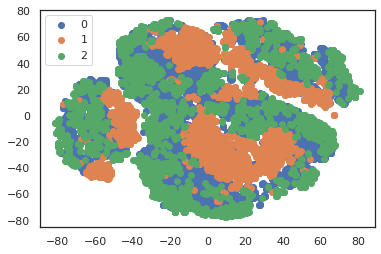

In [70]:
u_labels = np.unique(clustering.labels_)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(red_com[clustering.labels_ == i , 0] , red_com[clustering.labels_ == i , 1] , label = i)
plt.legend()
plt.show()

(array([9891.,    0.,    0.,    0.,    0., 5190.,    0.,    0.,    0.,
        4919.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

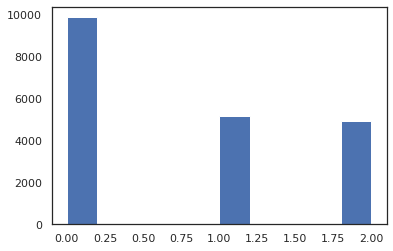

In [73]:
plt.hist(clustering.labels_)

In [81]:
data_used['class'] = datashort['class'].map({"GALAXY":0, "QSO":1, "STAR":2})
acc2 = np.sum(data_used["class"][:20000] == clustering.labels_)/len(clustering.labels_)
acc2

0.3956

In [84]:
data_used["class"][50],datashort["class"][50]

(0, 'GALAXY')